# Problem Set 4 CS129.18

## Requirements


>Geospatial Analytics is a domain heavily used in corporate and business data science. It's used for demand-forecasting, real-estate prediction, population estimation, and optimal route planning..

Using the lessons on DBSCAN, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What are the top 3 most common coffee places? ( 1pt )

2. What is the latitude variance and longitude variance, and explain why these variances are different. ( 3pts )

3. Explain what KMeans intertia is and how different it is from DBSCAN epsilon. ( 4pts )

4. Cluster the locations data with DBSCAN. ( 5pts )

5. Present an analysis of the data following the DBSCAN results. ( 7pts )
 - explain what the clusters mean
 - what does the # of clusters tell us
 - what is this information useful for





-----


Bonus 1 : What is your favorite coffee shop? (1pt)


Bonus 2 : Run everything on your own geospatial dataset, and answer the same questions listed above. (5pts)
Use this: https://developer.foursquare.com/docs/resources/categories
 
----

**Submit this file on Moodle on the submission link I will provide. This is due October 25 12nn.**

# conda install -c conda-forge folium 


In [8]:
import numpy as np
from sklearn.cluster import KMeans
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [9]:
# This assigns the coffeeshops data to a dataframe object that maps to the "df" variable
df = pd.read_csv("data/coffeeshops.csv")
df = df.drop_duplicates()

1.Top 3 most common coffee places

In [10]:
df['name'].value_counts().head(3)

Starbucks Coffee              151
The Coffee Bean & Tea Leaf     31
Seattle's Best Coffee          15
Name: name, dtype: int64

The top 3 most common coffee places within the dataset are 
Starbucks Coffee,
CTBL,
& Seattles's Best Coffee 

2.Latitude Variance vs Longitude Variance 

Latitude variance and longitude variance come from the fact that the plotted grids upon the earths surface is not equal, due to the height differences in the earths surface, as well as the earth not being a perfect sphere, being more of a semi-sphere. 

3.KMeans inertia vs DBSCAN epsilon

In the most basic terms, the difference between the KMeans inertia means and the DBSCAN epsiloin is that with the KMeans method, it separates samples in groups with equal variance, so it might be more connected to the distance between the points, so there has to be a required number of clusters stated for KMeans inertia. DBSCAN epsilon on the other hand uses a radius in the middle of a point within a cluster to see which of the nearby will be part of the cluster in a sense, so it is more based on how dense a cluster is for it to be a cluster. 

4.Cluster the location data with DBSCAN

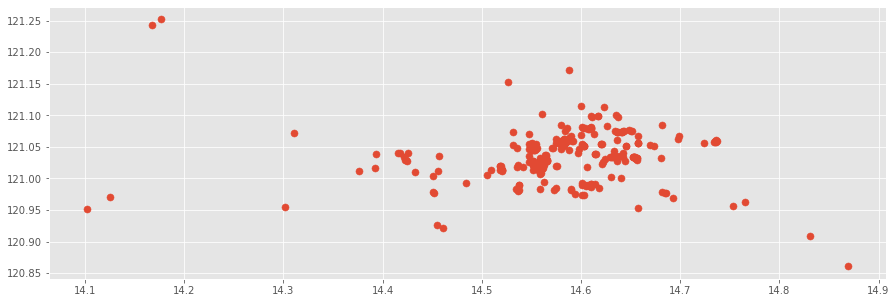

In [21]:
basemap = folium.Map(location=[14.5562297, 121.0204097], tiles='cartodbdark_matter', zoom_start=15)
for index, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lng']], radius=5,
    fill=True, popup = folium.Popup(row['name'], parse_html=True)).add_to(basemap)
basemap.save('coffeeshops.html')

uwu = np.array(df[['lat', 'lng']].values.tolist())
plt.scatter(uwu[:,0], uwu[:,1], s = 50)

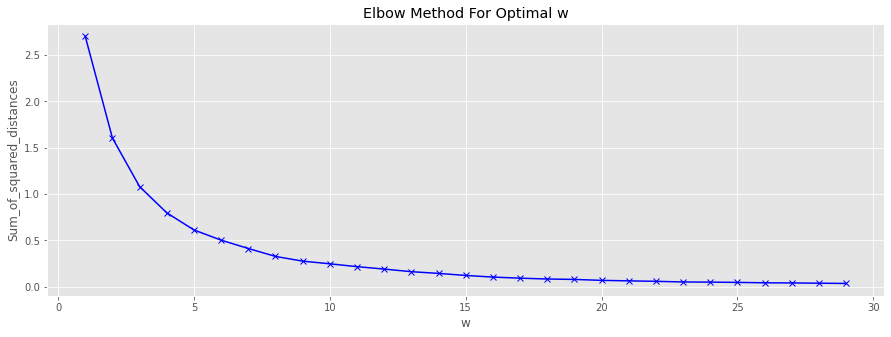

In [22]:
sum_of_squared_distances = []
wee = range(1,30)
for w in wee: 
    km = KMeans(n_clusters=w)
    km = km.fit(uwu)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(wee, sum_of_squared_distances, 'bx-')
plt.xlabel('w')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal w')
plt.show()

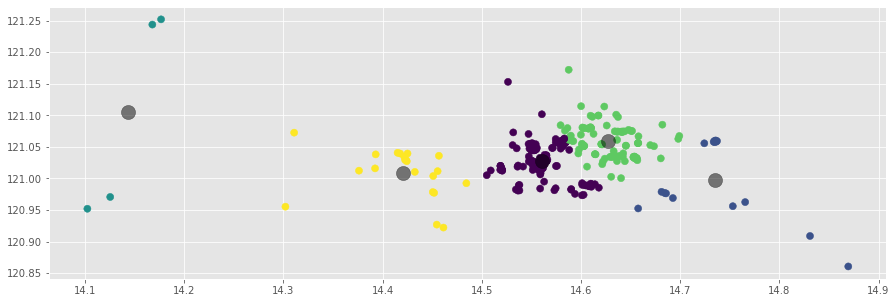

In [23]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(uwu)
y_kmeans = kmeans.predict(uwu)
plt.scatter(uwu[:, 0], uwu[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

5.Present an analysis of the data 

- The clusters are able to show which areas are the ones which have the most coffeeshops in them, based on longitude and latitude, even if longitude and latitude is not that accurate.

- Based on the Kmeans number of clusters, when we see larger numbers in a cluster, we know that those areas are hotspots for businesses, or it may state the economic power of the area. For clusters with smaller numbers, these are the areas with less economic power and may indicate a more residential than a business area. 

- These kinds of information is useful for businesses especially the ones who do franchising for them to be able to know the hotspots of a region, to either put more in the hotspots or venture into the 